In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

df = pd.read_csv("Customer Service_Requests_from_2010_to_Present.csv", low_memory = False )
df.head((10))

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01-01-16 1:50,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,01-01-16 1:53,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,01-01-16 1:42,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,01-01-16 8:27,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,01-01-16 1:17,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


In [20]:
df.info((10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [23]:
df.describe(())

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [36]:
# creating the request closing and creation of date.
df['Created Date']= pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Request_Closing_Time'] =df['Closed Date'] -df['Created Date']
df[['Created Date','Closed Date', 'Request_Closing_Time']]



,Created Date,Closed Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,0 days 00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:00,0 days 01:26:16
2,2015-12-31 23:59:29,2016-01-01 04:51:00,0 days 04:51:31
3,2015-12-31 23:57:46,2016-01-01 07:43:00,0 days 07:45:14
4,2015-12-31 23:56:58,2016-01-01 03:24:00,0 days 03:27:02
...,...,...,...
300693,2015-03-29 00:33:41,NaT,NaT
300694,2015-03-29 00:33:28,2015-03-29 02:33:59,0 days 02:00:31
300695,2015-03-29 00:33:03,2015-03-29 03:40:20,0 days 03:07:17
300696,2015-03-29 00:33:02,2015-03-29 04:38:35,0 days 04:05:33


In [5]:
df.columns


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [10]:
#removing the irrelevant columns.
columns =['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1', 'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name', 'School Number','School Region','School Code','School Phone Number','School Address','School City',
        'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough','Taxi Pick Up location','Bridge Highway Name','Bridge Highway Direction',
        'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
        'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
        'Location']
df = df.drop(columns=columns, errors='ignore')
print(df.columns)

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Taxi Pick Up Location',
       'Latitude', 'Longitude', 'Request_Closing_Time'],
      dtype='object')


In [12]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Taxi Pick Up Location',
       'Latitude', 'Longitude', 'Request_Closing_Time'],
      dtype='object')

In [7]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [14]:
# dropping columns which contains nan value.
df.dropna(inplace = True)
print(df)

Empty DataFrame
Columns: [Unique Key, Created Date, Closed Date, Agency, Complaint Type, Descriptor, Location Type, Incident Zip, City, Status, Resolution Description, Borough, Taxi Pick Up Location, Latitude, Longitude, Request_Closing_Time]
Index: []


In [16]:
df.columns


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Taxi Pick Up Location',
       'Latitude', 'Longitude', 'Request_Closing_Time'],
      dtype='object')

In [18]:
#calculating unique values.
columns = df.columns
df= {col: df[col].unique() for col in columns if col in df.columns}
df

{'Unique Key': array([], dtype=int64),
 'Created Date': <DatetimeArray>
 []
 Length: 0, dtype: datetime64[ns],
 'Closed Date': <DatetimeArray>
 []
 Length: 0, dtype: datetime64[ns],
 'Agency': array([], dtype=object),
 'Complaint Type': array([], dtype=object),
 'Descriptor': array([], dtype=object),
 'Location Type': array([], dtype=object),
 'Incident Zip': array([], dtype=float64),
 'City': array([], dtype=object),
 'Status': array([], dtype=object),
 'Resolution Description': array([], dtype=object),
 'Borough': array([], dtype=object),
 'Taxi Pick Up Location': array([], dtype=float64),
 'Latitude': array([], dtype=float64),
 'Longitude': array([], dtype=float64),
 'Request_Closing_Time': <TimedeltaArray>
 []
 Length: 0, dtype: timedelta64[ns]}

In [20]:
#importing the dataset.
df = pd.read_csv("Customer Service_Requests_from_2010_to_Present.csv", low_memory =False)
df_numeric = df.select_dtypes(include=['number'])
# calculating statistics of mean, standard deviation, sum, mean, skewness, kurotosis

sum_stat = pd.DataFrame( {
    'Sum': df_numeric.sum(),
    'Mean': df_numeric.mean(),
    'Standard Deviation': df_numeric.std(),
    'Skewness': df_numeric.skew(),
    'Kurtosis': df_numeric.kurt()
})


print(sum_stat)




                                       Sum          Mean  Standard Deviation  \
Unique Key                    9.412008e+12  3.130054e+07       573854.692971   
Incident Zip                  3.233869e+09  1.084889e+04          583.182081   
X Coordinate (State Plane)    2.986003e+11  1.004854e+06        21753.384466   
Y Coordinate (State Plane)    6.054729e+10  2.037545e+05        29880.183529   
School or Citywide Complaint  0.000000e+00           NaN                 NaN   
Vehicle Type                  0.000000e+00           NaN                 NaN   
Taxi Company Borough          0.000000e+00           NaN                 NaN   
Taxi Pick Up Location         0.000000e+00           NaN                 NaN   
Garage Lot Name               0.000000e+00           NaN                 NaN   
Latitude                      1.210202e+07  4.072588e+01            0.082012   
Longitude                    -2.196759e+07 -7.392563e+01            0.078454   

                              Skewness 

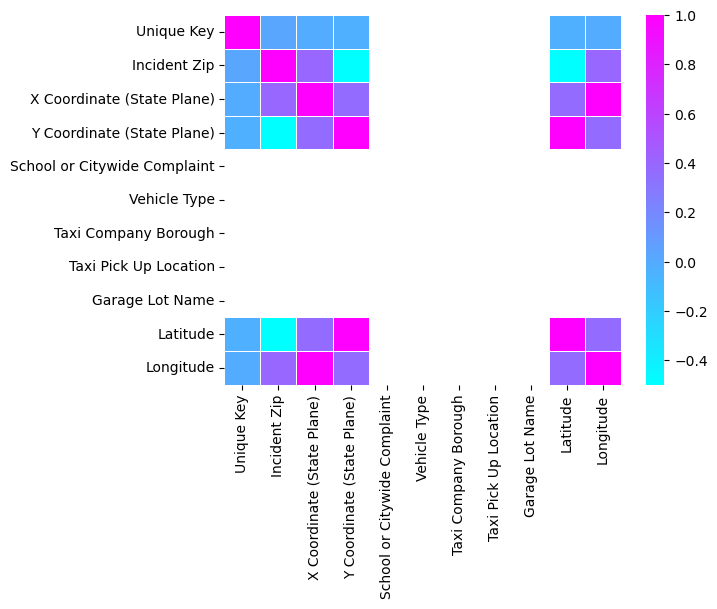

In [58]:
# printing the correlation variables.
corr = df.corr(numeric_only = True)
sns.heatmap(corr,  cmap='cool', fmt=".2f", linewidths=0.5)
corr
plt.show()

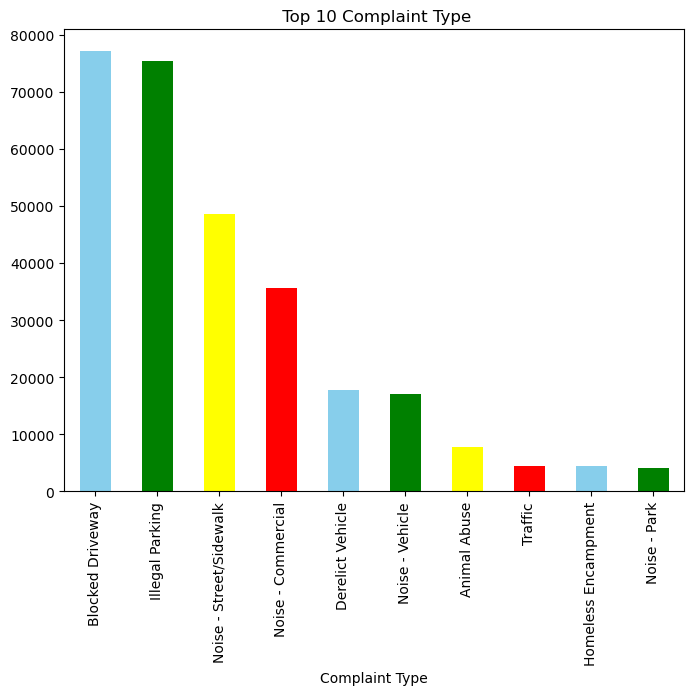

In [9]:
#calculating the complaint type.
df['Complaint Type'].value_counts(). head(10) .plot.bar(color =['skyblue', 'green', 'yellow','red'], figsize = (8,6))
plt.title(' Top 10 Complaint Type')
plt.show()

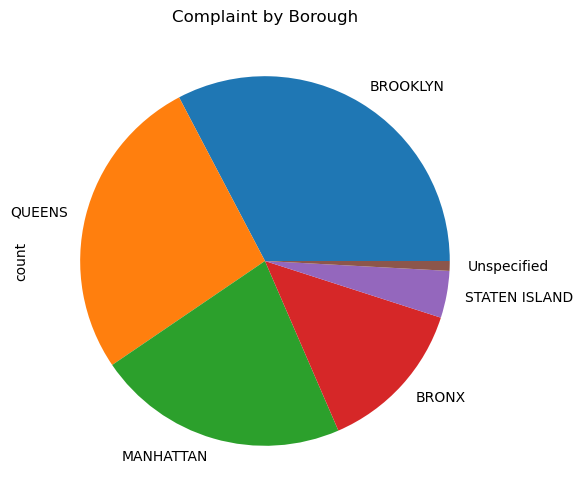

In [11]:
# calculating borough by complaint
df['Borough'].value_counts().plot.pie(figsize = (8,6))
plt.title('Complaint by Borough')
plt.show()

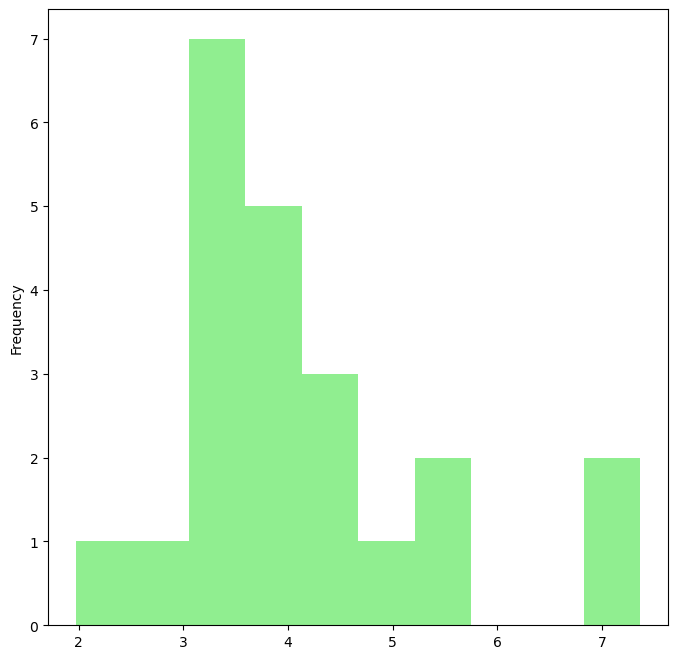

Complaint Type
Agency Issues                5.260324
Animal Abuse                 5.213244
Bike/Roller/Skate Chronic    3.766462
Blocked Driveway             4.740905
Derelict Vehicle             7.364140
Disorderly Youth             3.558584
Drinking                     3.861833
Graffiti                     7.151251
Homeless Encampment          4.365570
Illegal Fireworks            2.761139
Illegal Parking              4.501152
Noise - Commercial           3.147154
Noise - House of Worship     3.193298
Noise - Park                 3.410732
Noise - Street/Sidewalk      3.445224
Noise - Vehicle              3.588993
Panhandling                  4.372768
Posting Advertisement        1.975803
Squeegee                     4.045625
Traffic                      3.448681
Urinating in Public          3.626664
Vending                      4.013919
Name: Request_Closing_Time, dtype: float64


In [42]:
#calculating the average complaint closing time hrs.
avg_time = df.groupby('Complaint Type')['Request_Closing_Time'].mean()
avg_hrs =  avg_time.dt.total_seconds() / 3600
avg_hrs = avg_hrs [avg_hrs < 50]
plt.figure(figsize =(8,8))
avg_hrs.plot.hist(color =("lightgreen"))
plt.title=('Average Complaint Closing Time Hours')
plt.show()
print(avg_hrs)

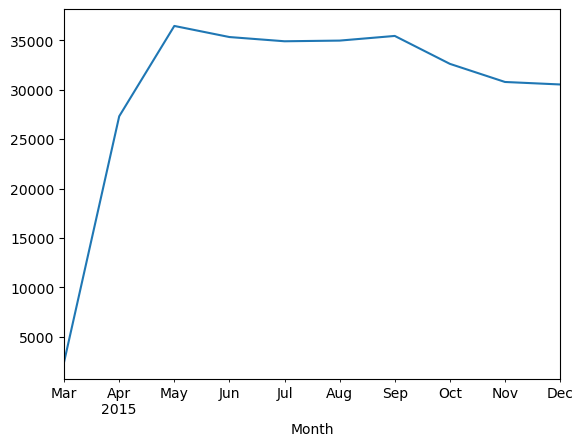

In [54]:
# creating month for Trend monthly complaints
df['Month'] = df['Created Date'].dt.to_period('M')
monthly_complaint = df.groupby('Month')['Complaint Type'].count()
monthly_complaint.plot.line()
plt.title=('Monthly Complaint By Trend')
plt.show()

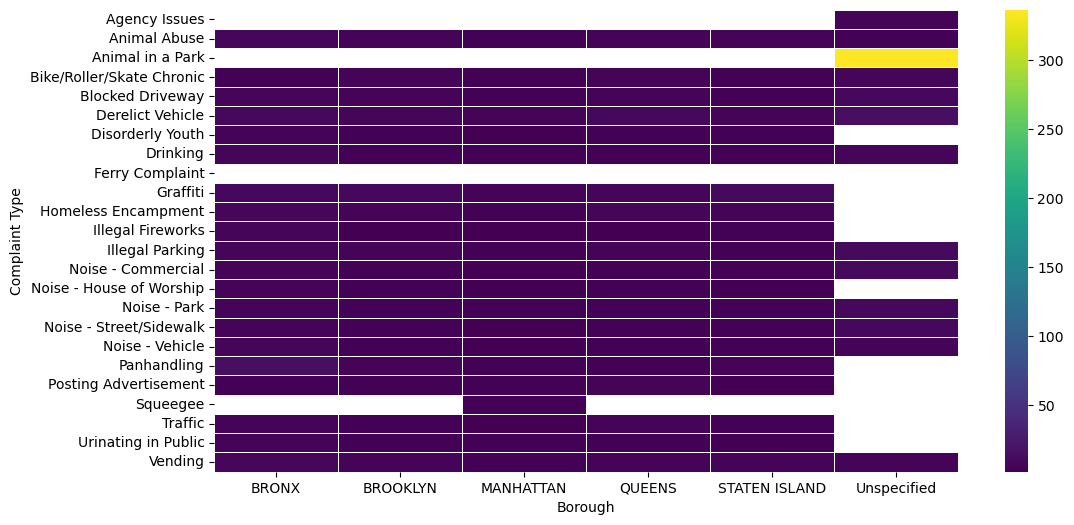

In [50]:
# calculating Complaint type 
Avg_complaint_pivot = df.groupby(['Complaint Type', 'Borough'])['Request_Closing_Time'].mean().dt.total_seconds() / 3600
# plotting the figure
plt.figure(figsize  =(12,6))
sns.heatmap(Avg_complaint_pivot.unstack() ,cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title = ('Complaint Type According to Borough and Closing Time (Heatmap)')
plt.show()

In [47]:
# test 1
df['Request_Closing_Time_hrs'] = df['Request_Closing_Time'].dt.total_seconds() / 3600

groups = [g['Request_Closing_Time_hrs'].dropna() for _, g in df.groupby('Complaint Type') if g['Request_Closing_Time_hrs'].dropna().nunique() > 1]

f_stat, p_value = f_oneway(*groups)
#calculating p value and stat
print("P-value:", p_value)
print("F-statistic:",f_stat)
# Interpretation
if p_value < 0.05:
    print("There is a significant difference on response time. Reject the null hypothesis.")
else:
    print("There is  no significant difference on response time.  Fail to reject the null hypothesis.")
    




P-value: 0.0
F-statistic: 391.30200518731294
There is a significant difference on response time. Reject the null hypothesis.


In [59]:
#calculating the complaint type and borough.
complaint_location_table = pd.crosstab(df['Complaint Type'], df['Borough'])
#calculating chi2_contingency
chi2_stat, p_value,dof,expected = chi2_contingency(complaint_location_table)
print(" p_value:", p_value)
print("Chi-square Statistic:", chi2_stat)
#comparing the interpretation value.
if p_value < 0.05 :
     print("\nReject the null hypothesis. There is  a relationship between complaint type and location")
else:
      print("\n Failed to reject the null hypothesis. There is  no relationship between complaint type and location")

    
plt.show()


 p_value: 0.0
Chi-square Statistic: 79641.55785644836

Reject the null hypothesis. There is  a relationship between complaint type and location
